In [155]:
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=pd.errors.ParserWarning)

import matplotlib.pyplot as plt
import seaborn as sns

### 1 Read data

In [124]:
occupations = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

age_groups = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

In [143]:
basic_path_to_dataset = "../../data/ml-1m/"

# read ratings
filename = "ratings.dat"
df_ratings = pd.read_csv(basic_path_to_dataset+filename, header=None, sep="::")
df_ratings.columns = ["UserID", "MovieID", "Rating", "Timestamp"]

# read users
filename = "users.dat"
df_users = pd.read_csv(basic_path_to_dataset+filename, header=None, sep="::")
df_users.columns = ["UserID", "Gender", "Age", "Occupation", "Zip-Code"]

# read movies
filename = "movies.dat"
df_movies = pd.read_csv(basic_path_to_dataset+filename, header=None, sep="::")
df_movies.columns = ["MovieID", "Title", "Genres"]

In [144]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [145]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [146]:
df_movies["Genres"] = df_movies["Genres"].apply(lambda x: x.split('|'))
df_movies["Year"] = df_movies["Title"].apply(lambda x: re.search(r'\((\d{4})\)', x)[1]).astype(int)
df_movies["Title"] = df_movies["Title"].apply(lambda x: re.sub(r'\s*\(\d{4}\)\s*$', '', x))
df_movies.head()

,MovieID,Title,Genres,Year
0,1,Toy Story,"[Animation, Children's, Comedy]",1995
1,2,Jumanji,"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama]",1995
4,5,Father of the Bride Part II,[Comedy],1995


### 2 Simple EDA

### 2.1 Movies 

In [147]:
df_movies.head()

,MovieID,Title,Genres,Year
0,1,Toy Story,"[Animation, Children's, Comedy]",1995
1,2,Jumanji,"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [148]:
df_movies["Year"].describe().astype(int)

count    3883
mean     1986
std        16
min      1919
25%      1982
50%      1994
75%      1997
max      2000
Name: Year, dtype: int64

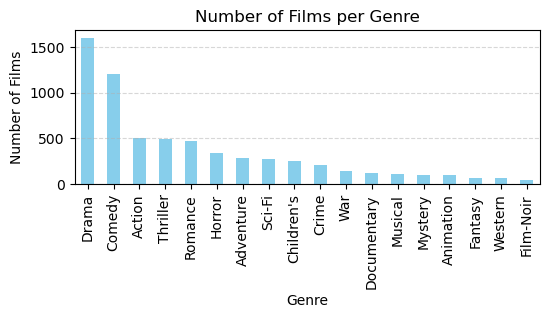

In [158]:
genre_counts = df_movies.explode('Genres')["Genres"].value_counts()

plt.figure(figsize=(6, 2)) 
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Films per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Films')
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

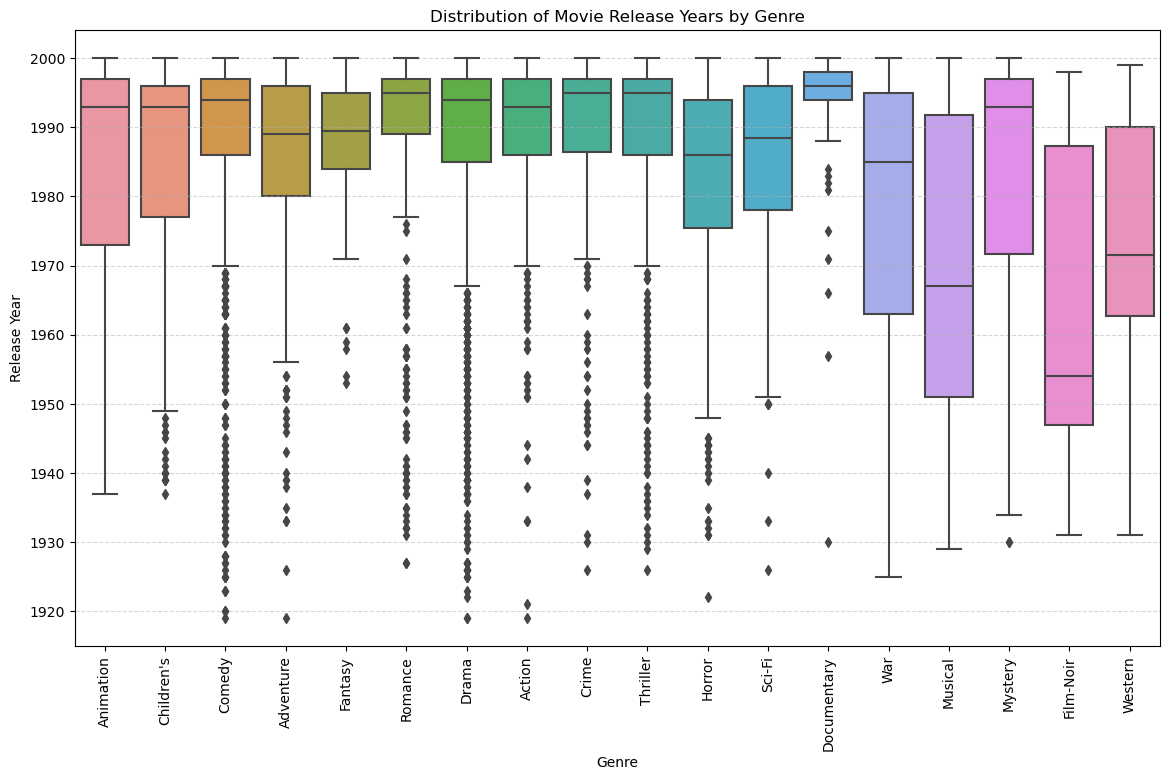

In [159]:
df_exploded = df_movies.explode('Genres')
plt.figure(figsize=(14, 8))
sns.boxplot(x='Genres', y='Year', data=df_exploded)
plt.title('Distribution of Movie Release Years by Genre')
plt.xlabel('Genre')
plt.ylabel('Release Year')
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [161]:
df_movies["Genres"]

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: Genres, Length: 3883, dtype: object